**Task 1 : Mini project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the Data**

In [209]:
df=pd.read_csv("Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

# Basic Data Exploration

In [210]:
df.shape

(8523, 12)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We need to predict Item_Outlet_Sales for given test data

In [212]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Handling missing value**

In [213]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

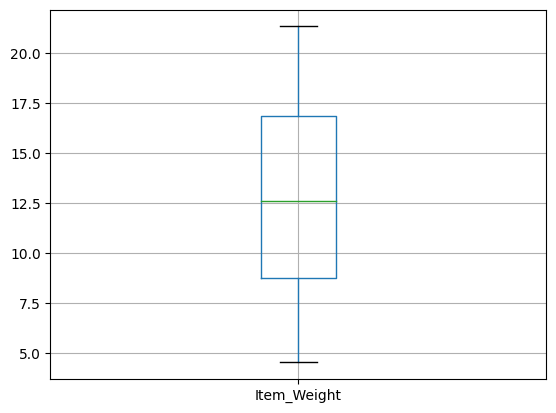

In [214]:

df.boxplot(column=["Item_Weight"])
plt.show()

Impute with mean value beacuse there is variable shouldn’t have extreme values .i.e. outliers. Item_Weight column has numerical values so we can replace null values with mean of the column.Therefore replacing null values with mean.

In [215]:
df["Item_Weight"].mean()

12.857645184135976

In [216]:
df["Item_Weight"].fillna(12.85,inplace=True)

In [217]:
df.dropna(inplace=True)

In [218]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Handling Duplicate records**

In [219]:
df.duplicated().sum()

0

**Handling Outliers**

<function matplotlib.pyplot.show(close=None, block=None)>

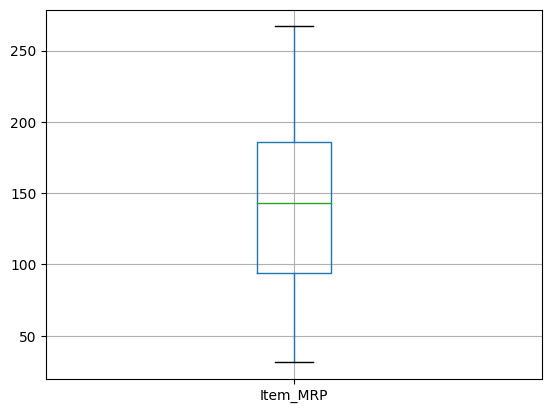

In [303]:
df.boxplot(column=["Item_MRP"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

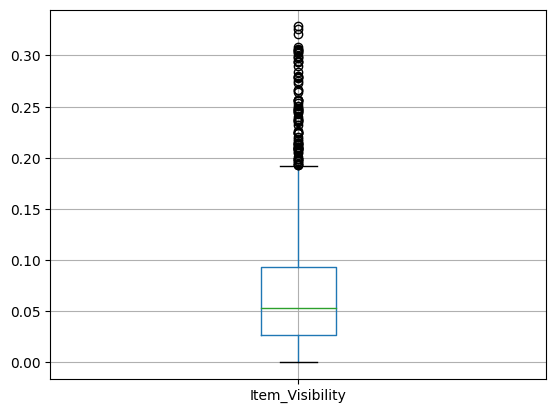

In [221]:
df.boxplot(column=["Item_Visibility"])
plt.show

In [229]:
df.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size'],inplace=True)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6113 non-null   float64
 1   Item_Fat_Content           6113 non-null   object 
 2   Item_Visibility            6113 non-null   float64
 3   Item_MRP                   6113 non-null   float64
 4   Outlet_Establishment_Year  6113 non-null   int64  
 5   Outlet_Location_Type       6113 non-null   object 
 6   Outlet_Type                6113 non-null   object 
 7   Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 429.8+ KB


In [231]:
df["Outlet_Type"].unique

<bound method Series.unique of 0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
4       Supermarket Type1
5       Supermarket Type2
              ...        
8517    Supermarket Type1
8518    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 6113, dtype: object>

In [232]:
pd.get_dummies(df["Outlet_Type"]).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
4,0,1,0,0
5,0,0,1,0


In [233]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Outlet_Type"]=le.fit_transform(df["Outlet_Type"])

In [234]:
df["Outlet_Type"]

0       1
1       2
2       1
4       1
5       2
       ..
8517    1
8518    1
8520    1
8521    2
8522    1
Name: Outlet_Type, Length: 6113, dtype: int64

In [235]:
df["Item_Fat_Content"].unique

<bound method Series.unique of 0       Low Fat
1       Regular
2       Low Fat
4       Low Fat
5       Regular
         ...   
8517        reg
8518    Low Fat
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 6113, dtype: object>

In [236]:
pd.get_dummies(df["Item_Fat_Content"]).head()

,LF,Low Fat,Regular,low fat,reg
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
4,0,1,0,0,0
5,0,0,1,0,0


In [237]:
from sklearn.preprocessing import LabelEncoder

In [238]:
le=LabelEncoder()
df["Item_Fat_Content"]=le.fit_transform(df["Item_Fat_Content"])

In [239]:
df["Item_Fat_Content"]

0       1
1       2
2       1
4       1
5       2
       ..
8517    4
8518    1
8520    1
8521    2
8522    1
Name: Item_Fat_Content, Length: 6113, dtype: int64

In [240]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [241]:
pd.get_dummies(df["Outlet_Location_Type"]).head()

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
4,0,0,1
5,0,0,1


In [242]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Outlet_Location_Type"]=le.fit_transform(df["Outlet_Location_Type"])

In [243]:
df["Outlet_Location_Type"]

0       0
1       2
2       0
4       2
5       2
       ..
8517    0
8518    2
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 6113, dtype: int64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6113 non-null   float64
 1   Item_Fat_Content           6113 non-null   int64  
 2   Item_Visibility            6113 non-null   float64
 3   Item_MRP                   6113 non-null   float64
 4   Outlet_Establishment_Year  6113 non-null   int64  
 5   Outlet_Location_Type       6113 non-null   int64  
 6   Outlet_Type                6113 non-null   int64  
 7   Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 429.8 KB


In [245]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.026779,-0.008634,0.029225,-0.004230,0.003226,-0.002969,0.007966
Item_Fat_Content,-0.026779,1.000000,0.034027,-0.000066,-0.004422,-0.003003,-0.006880,0.004729
Item_Visibility,-0.008634,0.034027,1.000000,-0.000651,-0.087452,-0.103078,-0.144951,-0.105854
Item_MRP,0.029225,-0.000066,-0.000651,1.000000,0.011632,0.000321,-0.004840,0.588939
Outlet_Establishment_Year,-0.004230,-0.004422,-0.087452,0.011632,1.000000,-0.089391,-0.048919,-0.057850
Outlet_Location_Type,0.003226,-0.003003,-0.103078,0.000321,-0.089391,1.000000,0.670156,0.206719
Outlet_Type,-0.002969,-0.006880,-0.144951,-0.004840,-0.048919,0.670156,1.000000,0.368181
Item_Outlet_Sales,0.007966,0.004729,-0.105854,0.588939,-0.057850,0.206719,0.368181,1.000000


<Axes: >

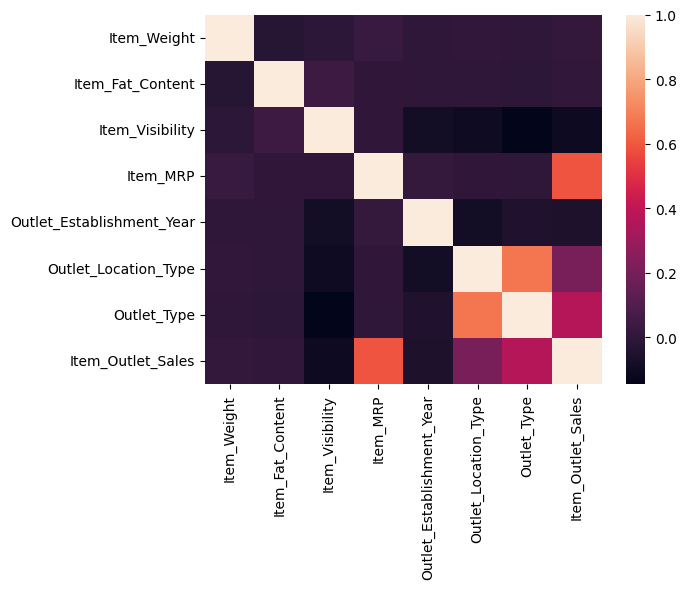

In [246]:
sns.heatmap(df.corr())

<ipython-input-308-db3ed12f69e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

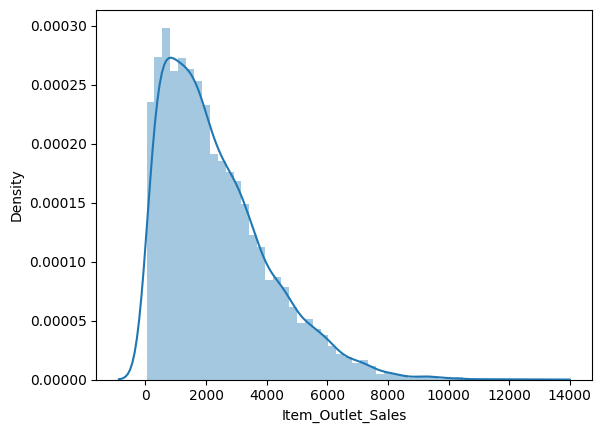

In [308]:
sns.distplot(df['Item_Outlet_Sales'])

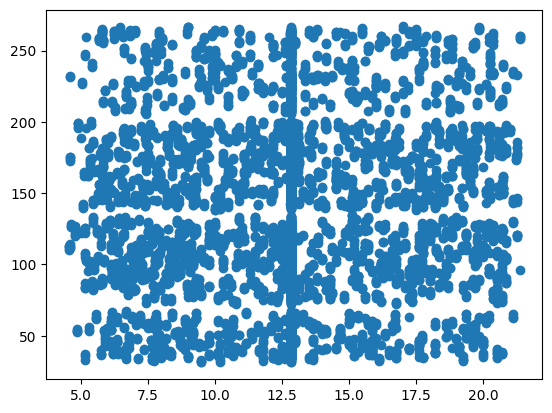

In [247]:
plt.scatter(data=df, x="Item_Weight", y="Item_MRP")

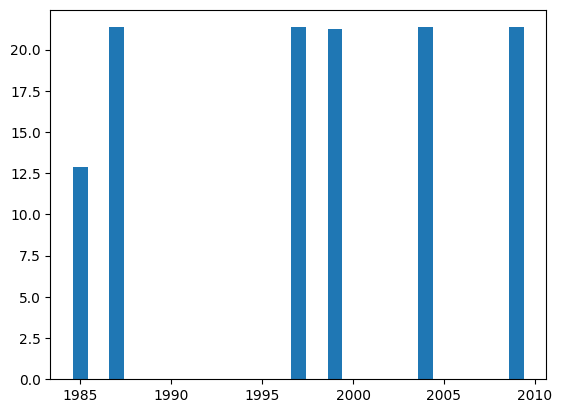

In [248]:
plt.bar(df['Outlet_Establishment_Year'],df['Item_Weight'])
plt.show()

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6113 non-null   float64
 1   Item_Fat_Content           6113 non-null   int64  
 2   Item_Visibility            6113 non-null   float64
 3   Item_MRP                   6113 non-null   float64
 4   Outlet_Establishment_Year  6113 non-null   int64  
 5   Outlet_Location_Type       6113 non-null   int64  
 6   Outlet_Type                6113 non-null   int64  
 7   Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 429.8 KB


In [250]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [251]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,249.8092,1999,0,1
1,5.920,2,0.019278,48.2692,2009,2,2
2,17.500,1,0.016760,141.6180,1999,0,1
4,8.930,1,0.000000,53.8614,1987,2,1
5,10.395,2,0.000000,51.4008,2009,2,2
...,...,...,...,...,...,...,...
8517,20.750,4,0.083607,178.8318,1997,0,1
8518,6.865,1,0.056783,214.5218,1987,2,1
8520,10.600,1,0.035186,85.1224,2004,1,1
8521,7.210,2,0.145221,103.1332,2009,2,2


In [252]:
y

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 6113, dtype: float64

In [253]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [255]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(4279, 7) (1834, 7) (4279,) (1834,)


**Linear Regression**

In [256]:
from sklearn.linear_model import LinearRegression


In [257]:
lr=LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [258]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [259]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)
predt=lr.predict(xtest)

In [260]:
lr.score(xtest,ytest)

0.4950705801777495

In [261]:
train= lr.score(xtrain,ytrain)
test= lr.score(xtest,ytest)
print(f"Training score :{train}\nTesting score: {test}")

Training score :0.4931107316621116
Testing score: 0.4950705801777495


In [267]:
mse=mean_squared_error(ytest,predt)
mae=mean_absolute_error(ytest,predt)
rmse=np.sqrt(mse)
r2=r2_score(ytest,predt)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("R2:",r2)

MSE: 1519249.7122328745
MAE: 922.4476296566879
RMSE: 1232.578481165753
R2: 0.4950705801777495


**Random Forest**

In [263]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [268]:
#Instantiation of the model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(xtrain, ytrain)

In [283]:
rf.score(xtrain,ytrain)

0.6196312083963971

In [304]:
prediction = rf.predict(xtest)
mse = mean_squared_error(ytest, prediction)
rmse = mse**.5
print(mse)
print(rmse)

1256329.7343394982
1120.8611574764727


In [279]:
## Define Grid
from sklearn.model_selection import GridSearchCV
from datetime import datetime
grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(xtrain, ytrain)
## show end time
print(datetime.now())

2023-08-07 11:01:46.228288
2023-08-07 11:05:14.437418


In [302]:
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(xtrain, ytrain)
# Predict on test data
prediction = rf.predict(xtest)
# Compute mean squared error
mse = mean_squared_error(ytest, prediction)
rmse = mse**.5
# Print results
print("MSE : % f" %(mse))
print("RMSE : % f" %(rmse))

MSE :  1256329.734339
RMSE :  1120.861157


This mean squared error result is lower than our base model which is great to see but overall, I’d still consider this performance inadequate.

**xgboost**

In [296]:
import xgboost as xg


In [285]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [288]:
#Fitting the model
xgb_r.fit(xtrain, ytrain)

[11:26:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [289]:
# Predict the model
pred = xgb_r.predict(xtest)

In [306]:
xgb_r.score(xtrain,ytrain)

0.6585388567700805

In [305]:
# RMSE Computation
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print("MSE : % f" %(mse))
print("RMSE : % f" %(rmse))

MSE :  1268749.689400
RMSE :  1126.387895


**Conclusion**: In this task I performed import the libary and clean the data then perform EDA on it After performing EDA split the data into train test and on that applied 3 algorithms
1)linear regression
2)Random Forest
3)XG boost
The values of r2 score,Mean Squared error,Mean absolute error,Root mean squared error for linear regression are  0.4950705801777495,1519249.7122328745,922.4476296566879,1232.578481165753 respectivly. Similarly for Random Forest values of r2 score,Mean Squared error,Root mean squared error are 0.6196312083963971,1256329.734339,1126.387895.
In Random Forest Algorithm mean squared error and root mean squared error results is lower than our base model which is great to see but overall  I’d still consider this performance inadequate.
For xgboost the Root Mean Squares error is 1126.387895,Mean Squared error is  1268749.689400 and r2 score is 0.6585388567700805.